In [2]:
import torch
what_were_covering={
    1: "data(prepare and load)",
    2: "build model",
    3: "fitting the model into the data(training)",
    4: "making prediction and evaluating the model",
    5: "saving and loading a model",
    6: "putting it altogether"
}
what_were_covering

{1: 'data(prepare and load)',
 2: 'build model',
 3: 'fitting the model into the data(training)',
 4: 'making prediction and evaluating the model',
 5: 'saving and loading a model',
 6: 'putting it altogether'}

In [3]:
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.6.0+cu124'

Data Preparing and loading
linear regression formula to make straight line with known *parameters*

In [4]:
#known parameters
weight=0.7
bias=0.3

#create
start=0
end=1
step=0.02
#usually capital case matrix/tensor, lowercase vector
#here capotal case vector
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
len(X),len(y)

(50, 50)

###splitting data into training and test sets

In [6]:
train_split=int(0.8*len(X))
train_split

40

In [7]:
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [8]:
X_train,y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [15]:
torch.randn(1)

tensor([0.2345])

###better data visualization

In [9]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  plots training data,test data and compares pedictions
  """
  plt.figure(figsize=(10,7))
  #plot training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")
  #test data in green
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing Data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="predictions")

  plt.legend(prop={"size":14});

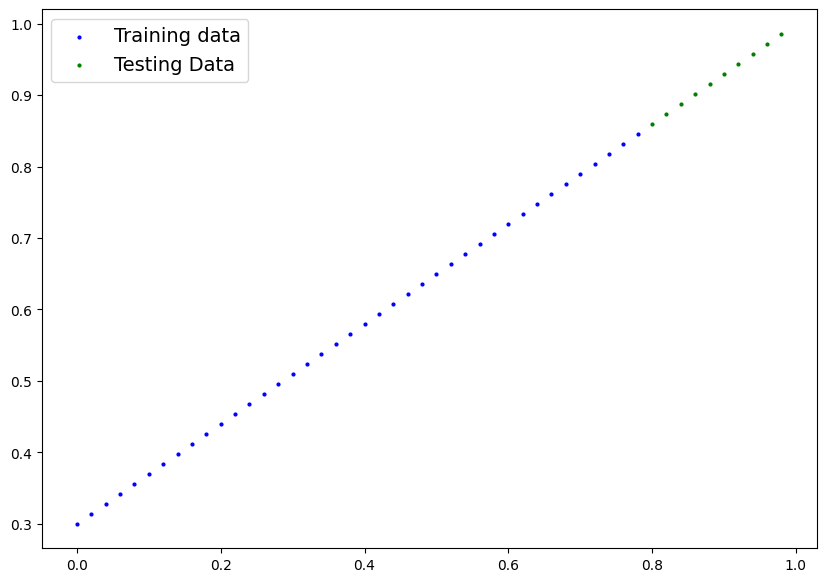

In [10]:
plot_predictions();

In [22]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

FIrst pytorch model

In [18]:
from torch import nn
#create linear reression model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,
                                          dtype=torch.float,
                              requires_grad=True))

    self.bias=nn.Parameter(torch.randn(1,
                                        dtype=torch.float,
                          requires_grad=True))
    def forward(self,x:torch.tensor)->torch.tensor: # <- x is the inpput data
      return self.weights * x +self.bias #linear regression eqn

In [27]:
torch.manual_seed(42)
model_0=LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [28]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [30]:
weight,bias


(0.7, 0.3)